In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import gensim
from gensim.models import ldamodel
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import string
from string import punctuation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
# Import dataset
df = pd.read_csv("K8 Reviews v0.2.csv")

# Displaying the dataset
df

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
...,...,...
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...


In [3]:
# Check the shape of the dataset
df.shape

(14675, 2)

In [4]:
# Check the names of the columns of the data
df.columns

Index(['sentiment', 'review'], dtype='object')

In [5]:
# Print the first entry
print(df[:1])

   sentiment                                  review
0          1  Good but need updates and improvements


In [6]:
# Print and check the data stores in the review column
df.review.values

array(['Good but need updates and improvements',
       "Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",
       'when I will get my 10% cash back.... its already 15 January..',
       ..., 'Awesome Gaget.. @ this price',
       'This phone is nice processing will be successful but dual camera is not be successfully in dual mod',
       'Good product but the pakeging was not enough.'], dtype=object)

In [7]:
# Save the review information to a new variable called 'data'
data = df.review.values.tolist()

# Print and check the variable
data

['Good but need updates and improvements',
 "Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",
 'when I will get my 10% cash back.... its already 15 January..',
 'Good',
 'The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon',
 "Only I'm telling don't buyI'm totally disappointedPoor batteryPoor cameraWaste of money",
 'Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note',
 'The battery level has worn down',
 "It'

In [8]:
# Print and check the first entry in the variable
print(data[:1])

['Good but need updates and improvements']


In [9]:
# Print and check the second entry in the variable
print(data[:2])

['Good but need updates and improvements', "Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me."]


In [10]:
# Convert the all the data to lower-case
df_lower = [sent.lower() for sent in df.review]

# Print and check the result after converting it to lower-case
df_lower

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it'

In [11]:
# Tokenize all the words in the data
df_token = [word_tokenize(sent) for sent in df_lower]

# Print and check the tokens
df_token

[['good', 'but', 'need', 'updates', 'and', 'improvements'],
 ['worst',
  'mobile',
  'i',
  'have',
  'bought',
  'ever',
  ',',
  'battery',
  'is',
  'draining',
  'like',
  'hell',
  ',',
  'backup',
  'is',
  'only',
  '6',
  'to',
  '7',
  'hours',
  'with',
  'internet',
  'uses',
  ',',
  'even',
  'if',
  'i',
  'put',
  'mobile',
  'idle',
  'its',
  'getting',
  'discharged.this',
  'is',
  'biggest',
  'lie',
  'from',
  'amazon',
  '&',
  'lenove',
  'which',
  'is',
  'not',
  'at',
  'all',
  'expected',
  ',',
  'they',
  'are',
  'making',
  'full',
  'by',
  'saying',
  'that',
  'battery',
  'is',
  '4000mah',
  '&',
  'booster',
  'charger',
  'is',
  'fake',
  ',',
  'it',
  'takes',
  'at',
  'least',
  '4',
  'to',
  '5',
  'hours',
  'to',
  'be',
  'fully',
  'charged.do',
  "n't",
  'know',
  'how',
  'lenovo',
  'will',
  'survive',
  'by',
  'making',
  'full',
  'of',
  'us.please',
  'don',
  ';',
  't',
  'go',
  'for',
  'this',
  'else',
  'you',
  'will

In [12]:
# Generate POS-Tags for the tokens
df_tagged = [nltk.pos_tag(tokens) for tokens in df_token]

# Print and check the generated POS-Tags
df_tagged

[[('good', 'JJ'),
  ('but', 'CC'),
  ('need', 'VBP'),
  ('updates', 'NNS'),
  ('and', 'CC'),
  ('improvements', 'NNS')],
 [('worst', 'JJS'),
  ('mobile', 'NN'),
  ('i', 'NN'),
  ('have', 'VBP'),
  ('bought', 'VBN'),
  ('ever', 'RB'),
  (',', ','),
  ('battery', 'NN'),
  ('is', 'VBZ'),
  ('draining', 'VBG'),
  ('like', 'IN'),
  ('hell', 'NN'),
  (',', ','),
  ('backup', 'NN'),
  ('is', 'VBZ'),
  ('only', 'RB'),
  ('6', 'CD'),
  ('to', 'TO'),
  ('7', 'CD'),
  ('hours', 'NNS'),
  ('with', 'IN'),
  ('internet', 'JJ'),
  ('uses', 'NNS'),
  (',', ','),
  ('even', 'RB'),
  ('if', 'IN'),
  ('i', 'JJ'),
  ('put', 'VBP'),
  ('mobile', 'JJ'),
  ('idle', 'NN'),
  ('its', 'PRP$'),
  ('getting', 'VBG'),
  ('discharged.this', 'NN'),
  ('is', 'VBZ'),
  ('biggest', 'JJS'),
  ('lie', 'NN'),
  ('from', 'IN'),
  ('amazon', 'NN'),
  ('&', 'CC'),
  ('lenove', 'NN'),
  ('which', 'WDT'),
  ('is', 'VBZ'),
  ('not', 'RB'),
  ('at', 'IN'),
  ('all', 'DT'),
  ('expected', 'VBN'),
  (',', ','),
  ('they', 'PRP'),


In [13]:
# Declare an empty list to store all the nouns in the tokens
df_noun = []

# Iterate over all the tokens to select only the nouns and save then to 'df_noun'
for sent in df_tagged:
    df_noun.append([token for token in sent if re.search("NN.*", token[1])])

# Print and check the nouns in tokens
df_noun

[[('updates', 'NNS'), ('improvements', 'NNS')],
 [('mobile', 'NN'),
  ('i', 'NN'),
  ('battery', 'NN'),
  ('hell', 'NN'),
  ('backup', 'NN'),
  ('hours', 'NNS'),
  ('uses', 'NNS'),
  ('idle', 'NN'),
  ('discharged.this', 'NN'),
  ('lie', 'NN'),
  ('amazon', 'NN'),
  ('lenove', 'NN'),
  ('battery', 'NN'),
  ('charger', 'NN'),
  ('hours', 'NNS'),
  ('don', 'NN')],
 [('i', 'NN'), ('%', 'NN'), ('cash', 'NN'), ('..', 'NN')],
 [],
 [('phone', 'NN'),
  ('everthey', 'NN'),
  ('phone', 'NN'),
  ('problem', 'NN'),
  ('amazon', 'NN'),
  ('phone', 'NN'),
  ('amazon', 'NN')],
 [('camerawaste', 'NN'), ('money', 'NN')],
 [('phone', 'NN'),
  ('allot', 'NN'),
  ('..', 'NNP'),
  ('reason', 'NN'),
  ('k8', 'NNS')],
 [('battery', 'NN'), ('level', 'NN')],
 [('problems', 'NNS'),
  ('phone', 'NN'),
  ('hanging', 'NN'),
  ('problems', 'NNS'),
  ('note', 'NN'),
  ('station', 'NN'),
  ('ahmedabad', 'NN'),
  ('years', 'NNS'),
  ('phone', 'NN'),
  ('lenovo', 'NN')],
 [('lot', 'NN'), ('glitches', 'NNS'), ('thing',

In [14]:
# Create WordNetLemmatizer object
lem = WordNetLemmatizer()

# Declare an empty list to store all the lemmatized tokens
df_lem = []

# Iterate over all the nouns to lemmatize and store them
for sent in df_noun:
    df_lem.append([lem.lemmatize(word[0]) for word in sent])

# Print and check the lemmatized noun tokens
df_lem

[['update', 'improvement'],
 ['mobile',
  'i',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour',
  'don'],
 ['i', '%', 'cash', '..'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'allot', '..', 'reason', 'k8'],
 ['battery', 'level'],
 ['problem',
  'phone',
  'hanging',
  'problem',
  'note',
  'station',
  'ahmedabad',
  'year',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'thing', 'option'],
 ['wrost'],
 ['phone', 'charger', 'damage', 'month'],
 ['item', 'battery', 'life'],
 ['i',
  'battery',
  'problem',
  'motherboard',
  'problem',
  'month',
  'mobile',
  'life'],
 ['phone', 'slim', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time', 'i'],
 ['product',
  'prize',
  'range',
  'specification',
  'comparison',
  'mobile',
  'range',
  'i',
  'phone',
  'seal',
  'i',
  'credit',
  'card',
  'i',
  '..',
  '..

In [15]:
# Store the stopwords in english to a new variable 'sw'
sw = stopwords.words('english')

# Print and check the stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# Combine the english stopwords and punctuations and save them to a new list 'updated_sw' to create user defined list of stopwords
updated_sw = sw + list(punctuation)

# Print and check the new list of stopwords
print(updated_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# Declare an empty list to save the tokens after removing stopwords
df_stopwrd_rm = []

# Iterate over the lemmatized tokens to remove the stopwords and save the rest to the new list 'df_stopwrd_rm'
for sent in df_lem:
    df_stopwrd_rm.append([txt for txt in sent if txt not in updated_sw])

# Print and check the updated tokens
df_stopwrd_rm

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['cash', '..'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'allot', '..', 'reason', 'k8'],
 ['battery', 'level'],
 ['problem',
  'phone',
  'hanging',
  'problem',
  'note',
  'station',
  'ahmedabad',
  'year',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'thing', 'option'],
 ['wrost'],
 ['phone', 'charger', 'damage', 'month'],
 ['item', 'battery', 'life'],
 ['battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'],
 ['phone', 'slim', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time'],
 ['product',
  'prize',
  'range',
  'specification',
  'comparison',
  'mobile',
  'range',
  'phone',
  'seal',
  'credit',
  'card',
  '..',
  '..',
  'deal',
  'amazon',
  '..'],
 ['battery', '..', 'solution', 'batte

In [18]:
# Generate the word-ID dictionary for the tokens
word_dict = corpora.Dictionary(df_stopwrd_rm)

# Print ad check the words and corresponding IDs
print(word_dict.token2id)

{'improvement': 0, 'update': 1, 'amazon': 2, 'backup': 3, 'battery': 4, 'charger': 5, 'discharged.this': 6, 'hell': 7, 'hour': 8, 'idle': 9, 'lenove': 10, 'lie': 11, 'mobile': 12, 'us': 13, '..': 14, 'cash': 15, 'everthey': 16, 'phone': 17, 'problem': 18, 'camerawaste': 19, 'money': 20, 'allot': 21, 'k8': 22, 'reason': 23, 'level': 24, 'ahmedabad': 25, 'hanging': 26, 'lenovo': 27, 'note': 28, 'station': 29, 'year': 30, 'glitch': 31, 'lot': 32, 'option': 33, 'thing': 34, 'wrost': 35, 'damage': 36, 'month': 37, 'item': 38, 'life': 39, 'motherboard': 40, 'battry': 41, 'screen': 42, 'slim': 43, 'headset': 44, 'time': 45, 'card': 46, 'comparison': 47, 'credit': 48, 'deal': 49, 'prize': 50, 'product': 51, 'range': 52, 'seal': 53, 'specification': 54, 'solution': 55, 'smartphone': 56, 'galery': 57, 'speaker': 58, 'camera': 59, 'features.excelent': 60, 'speed.excellent': 61, 'call': 62, 'cast': 63, 'hotspot': 64, 'wifi': 65, 'cable': 66, 'usb': 67, 'display': 68, 'price': 69, 'any1': 70, 'func

In [19]:
# Save the bag of words to a new variable 'txt'
txt = df_stopwrd_rm

# Print and check the bag of words
txt

[['update', 'improvement'],
 ['mobile',
  'battery',
  'hell',
  'backup',
  'hour',
  'us',
  'idle',
  'discharged.this',
  'lie',
  'amazon',
  'lenove',
  'battery',
  'charger',
  'hour'],
 ['cash', '..'],
 [],
 ['phone', 'everthey', 'phone', 'problem', 'amazon', 'phone', 'amazon'],
 ['camerawaste', 'money'],
 ['phone', 'allot', '..', 'reason', 'k8'],
 ['battery', 'level'],
 ['problem',
  'phone',
  'hanging',
  'problem',
  'note',
  'station',
  'ahmedabad',
  'year',
  'phone',
  'lenovo'],
 ['lot', 'glitch', 'thing', 'option'],
 ['wrost'],
 ['phone', 'charger', 'damage', 'month'],
 ['item', 'battery', 'life'],
 ['battery', 'problem', 'motherboard', 'problem', 'month', 'mobile', 'life'],
 ['phone', 'slim', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time'],
 ['product',
  'prize',
  'range',
  'specification',
  'comparison',
  'mobile',
  'range',
  'phone',
  'seal',
  'credit',
  'card',
  '..',
  '..',
  'deal',
  'amazon',
  '..'],
 ['battery', '..', 'solution', 'batte

In [20]:
# Generate the document term matrix for the bag of words
doc_term_matrix = [word_dict.doc2bow(ex) for ex in txt]    # corpus

# Print and check the document term matrix
doc_term_matrix

[[(0, 1), (1, 1)],
 [(2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(14, 1), (15, 1)],
 [],
 [(2, 2), (16, 1), (17, 3), (18, 1)],
 [(19, 1), (20, 1)],
 [(14, 1), (17, 1), (21, 1), (22, 1), (23, 1)],
 [(4, 1), (24, 1)],
 [(17, 2), (18, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(31, 1), (32, 1), (33, 1), (34, 1)],
 [(35, 1)],
 [(5, 1), (17, 1), (36, 1), (37, 1)],
 [(4, 1), (38, 1), (39, 1)],
 [(4, 1), (12, 1), (18, 2), (37, 1), (39, 1), (40, 1)],
 [(3, 1), (17, 1), (41, 1), (42, 1), (43, 1)],
 [(44, 1)],
 [(45, 1)],
 [(2, 1),
  (12, 1),
  (14, 3),
  (17, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1)],
 [(4, 2), (14, 1), (39, 1), (55, 1)],
 [(56, 1)],
 [],
 [(17, 1), (18, 1), (57, 1), (58, 1)],
 [(4, 1), (59, 1), (60, 1), (61, 1)],
 [(51, 1)],
 [(4, 1), (14, 1), (17, 1), (51, 2), (59, 1)],
 [(12, 1), (33, 2), (42, 1), (62, 1), (63, 1), (6

In [21]:
# Generate an LDA model with 12 topics using gensim library
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=word_dict, num_topics=12, random_state=100, chunksize=1000, passes=50, iterations=100)

# Print and check the keywords for each topic
lda_model.print_topics()

[(0,
  '0.152*"money" + 0.151*"...." + 0.069*"waste" + 0.058*"value" + 0.053*"performance" + 0.043*"mark" + 0.027*".." + 0.020*"dont" + 0.018*"plz" + 0.017*"class"'),
 (1,
  '0.093*"screen" + 0.041*"delivery" + 0.036*"glass" + 0.029*"mode" + 0.026*"cast" + 0.025*"light" + 0.025*"power" + 0.020*"piece" + 0.019*"side" + 0.019*"day"'),
 (2,
  '0.135*"charger" + 0.108*"speaker" + 0.069*"everything" + 0.065*"charging" + 0.061*"turbo" + 0.051*"superb" + 0.041*"charge" + 0.025*"experience" + 0.018*"gud" + 0.018*"hour"'),
 (3,
  '0.390*"product" + 0.054*"price" + 0.054*"feature" + 0.022*".." + 0.019*"flash" + 0.016*"till" + 0.014*"sensor" + 0.014*"option" + 0.013*"need" + 0.011*"fingerprint"'),
 (4,
  '0.221*"quality" + 0.217*"camera" + 0.044*"display" + 0.034*"hai" + 0.027*"picture" + 0.025*"bit" + 0.019*"performance" + 0.014*"pls" + 0.013*"image" + 0.012*"ho"'),
 (5,
  '0.106*"phone" + 0.076*"note" + 0.061*"lenovo" + 0.051*"k8" + 0.048*"amazon" + 0.042*"month" + 0.042*"service" + 0.028*"day"

In [22]:
# Print and check the perplexity of the 
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))

# Generate a coherence model from the LDA model
coherence_lda_model = CoherenceModel(model=lda_model, texts=df_stopwrd_rm, dictionary=word_dict, coherence='c_v')

# Get the coherence value and store in an variable 'coherence_model'
coherence_model = coherence_lda_model.get_coherence()

# Print and check the coherence score
print('Coherence :', coherence_model)

Perplexity:  -7.847097219426187
Coherence : 0.4869448124905382


In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, word_dict)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.288822  0.051272       1        1  25.583110
5     -0.255994 -0.146932       2        1  13.880941
9     -0.228954  0.090153       3        1  11.488662
10    -0.066408 -0.220684       4        1   8.176189
4     -0.001298  0.311682       5        1   7.098957
1      0.056813 -0.037028       6        1   6.798467
3      0.067729  0.021593       7        1   6.331909
11     0.174146 -0.023598       8        1   4.939464
0      0.106813  0.094558       9        1   4.665342
2      0.119875 -0.013038      10        1   3.829548
7      0.157082 -0.077294      11        1   3.796945
8      0.159018 -0.050685      12        1   3.410466, topic_info=        Term         Freq        Total Category  logprob  loglift
4    battery  3119.000000  3119.000000  Default  30.0000  30.0000
51   product  2202.000000  2202.000000  Default  29.0000  29.0000
17     phone  7198.000000  7198.000000  Default  28.0000  28.0000
59    camera  3299.000000  3299.000000  Default  27.0000  27.0000
18   problem  1545.000000  1545.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
299   rating    51.623760    58.491754  Topic12  -4.0771   3.2534
33    option   166.739681   386.344188  Topic12  -2.9046   2.5380
534    store    20.744238    26.825334  Topic12  -4.9888   3.1212
780       hi    33.746905    70.887971  Topic12  -4.5022   2.6361
653     show    20.708079    37.518792  Topic12  -4.9905   2.7840

[506 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
14        1  0.843418         ..
14        7  0.083163         ..
14        9  0.073341         ..
144       9  0.997849       ....
104      11  0.997990      .....
...     ...       ...        ...
350       5  0.979913         ye
30        2  0.988799       year
1229      5  0.969709  yesterday
2324      5  0.936928       zoom
3305      8  0.937468          📷

[541 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 10, 11, 5, 2, 4, 12, 1, 3, 8, 9])

## KEY TAKE-AWAYS

    1. Lots of interferences have been found between the topics shown in visualization, with No. of topics = 12.
    3. Few gibberish tokens have become included in the topic keywords, which needs to be removed.
    2. No. of topics needs to be optimized.

In [24]:
# Remove gibbrish words keywords found in topics from the tokens
contextual_sw = ['....', '..', 'plz', '.....', '......']

# Declare an empty list to save the tokens after removing stopwords
df_stopwords_rm_update = []

# Iterate over the lemmatized tokens to remove the stopwords and save the rest to the new list 'df_stopwrd_rm'
for sent in df_stopwrd_rm:
    df_stopwords_rm_update.append([txt for txt in sent if txt not in contextual_sw])

# Copying the data updated data to variable 'df_stopwords_rm'
df_stopwrd_rm = df_stopwords_rm_update

# Generate updated Dictionary
word_dict = corpora.Dictionary(df_stopwrd_rm)

# Generate updated text
txt = df_stopwrd_rm

# Generate the updated DTM
doc_term_matrix = [word_dict.doc2bow(ex) for ex in txt]

# Generate an LDA model with 12 topics using gensim library
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=word_dict, num_topics=12, random_state=100, chunksize=1000, passes=50, iterations=100)

# Print and check the keywords for each topic
lda_model.print_topics()

[(0,
  '0.360*"product" + 0.243*"mobile" + 0.039*"delivery" + 0.034*"performance" + 0.025*"price" + 0.022*"amazon" + 0.014*"thanks" + 0.012*"time" + 0.012*"cost" + 0.010*"bill"'),
 (1,
  '0.130*"charger" + 0.126*"money" + 0.069*"value" + 0.038*"expectation" + 0.035*"turbo" + 0.032*"super" + 0.027*"piece" + 0.026*"till" + 0.024*"month" + 0.023*"cam"'),
 (2,
  '0.063*"budget" + 0.058*"system" + 0.049*"box" + 0.049*"smartphone" + 0.049*"clarity" + 0.047*"headphone" + 0.044*"earphone" + 0.038*"function" + 0.036*"worth" + 0.029*"ok"'),
 (3,
  '0.083*"price" + 0.060*"phone" + 0.045*"range" + 0.045*"mode" + 0.027*"camera" + 0.027*"hai" + 0.022*"photo" + 0.021*"h" + 0.018*"jio" + 0.017*"video"'),
 (4,
  '0.141*"problem" + 0.127*"issue" + 0.111*"network" + 0.048*"everything" + 0.047*"call" + 0.045*"charging" + 0.021*"please" + 0.021*"voice" + 0.020*"signal" + 0.018*"lot"'),
 (5,
  '0.296*"battery" + 0.059*"problem" + 0.059*"backup" + 0.055*"heating" + 0.047*"hour" + 0.043*"issue" + 0.042*"day" 

In [25]:
# Print and check the perplexity of the 
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))

# Generate a coherence model from the LDA model
coherence_lda_model = CoherenceModel(model=lda_model, texts=df_stopwrd_rm, dictionary=word_dict, coherence='c_v')

# Get the coherence value and store in an variable 'coherence_model'
coherence_model = coherence_lda_model.get_coherence()

# Print and check the coherence score
print('Coherence :', coherence_model)

Perplexity:  -7.883198981875688
Coherence : 0.4913170734545515


In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, word_dict)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.277139  0.142478       1        1  21.174995
10    -0.242664 -0.033297       2        1  17.952547
5     -0.151285 -0.287949       3        1  12.059219
3     -0.118167  0.200994       4        1   9.183834
9      0.016486  0.073851       5        1   8.275288
0      0.059200  0.006773       6        1   6.591534
4     -0.013844 -0.263107       7        1   5.623674
1      0.184996 -0.018003       8        1   4.049776
7      0.028575  0.142821       9        1   4.011945
8      0.148256  0.026971      10        1   3.823890
11     0.180561 -0.003942      11        1   3.789273
2      0.185025  0.012410      12        1   3.464024, topic_info=           Term         Freq        Total Category  logprob  loglift
4       battery  3100.000000  3100.000000  Default  30.0000  30.0000
50      product  2060.000000  2060.000000  Default  29.0000  29.0000
16        phone  7129.000000  7129.000000  Default  28.0000  28.0000
12       mobile  1391.000000  1391.000000  Default  27.0000  27.0000
58       camera  3258.000000  3258.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1634   download    13.191383    14.127553  Topic12  -5.4278   3.2942
2037  vibration    11.680741    12.616920  Topic12  -5.5494   3.2856
859      folder    11.374324    12.310483  Topic12  -5.5760   3.2836
299         bit    46.651058   160.663585  Topic12  -4.1647   2.1261
694        back    16.904327    27.962144  Topic12  -5.1798   2.8595

[517 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
364       5  0.959978    .......
2431      9  0.938737  .........
239       7  0.974623       .but
416       3  0.942805         .i
380      12  0.955683  accessory
...     ...       ...        ...
1115     12  0.939886        wow
34        9  0.962037      wrost
346       4  0.977777         ye
29        5  0.994811       year
1271      7  0.925206          🔋

[563 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 11, 6, 4, 10, 1, 5, 2, 8, 9, 12, 3])

## KEY TAKE-AWAYS

    1. Few gibberish tokens have become included in the topic keywords, which needs to be removed.
    2. Singular letters and punctuations were found in the keywords which needs to be removed from tokens.

In [27]:
# Remove gibbrish words keywords found in topics from the tokens
contextual_sw = ['ok', 'ho'] + list(punctuation) + list(string.ascii_lowercase)

# Declare an empty list to save the tokens after removing stopwords
df_stopwords_rm_update = []

# Iterate over the lemmatized tokens to remove the stopwords and save the rest to the new list 'df_stopwrd_rm'
for sent in df_stopwrd_rm:
    df_stopwords_rm_update.append([txt for txt in sent if txt not in contextual_sw])

# Copying the data updated data to variable 'df_stopwords_rm'
df_stopwrd_rm = df_stopwords_rm_update

# Generate updated Dictionary
word_dict = corpora.Dictionary(df_stopwrd_rm)

# Generate updated text
txt = df_stopwrd_rm

# Generate the updated DTM
doc_term_matrix = [word_dict.doc2bow(ex) for ex in txt]

# Generate an LDA model with 12 topics using gensim library
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=word_dict, num_topics=12, random_state=100, chunksize=1000, passes=50, iterations=100)

# Print and check the keywords for each topic
lda_model.print_topics()

[(0,
  '0.561*"product" + 0.046*"amazon" + 0.020*"service" + 0.018*"lenovo" + 0.017*"expectation" + 0.013*"wise" + 0.013*"weight" + 0.011*"customer" + 0.010*"need" + 0.009*"hell"'),
 (1,
  '0.040*"delivery" + 0.034*"update" + 0.034*"lot" + 0.033*"service" + 0.031*"issue" + 0.028*"system" + 0.027*"star" + 0.026*"support" + 0.024*"time" + 0.023*"apps"'),
 (2,
  '0.172*"note" + 0.090*"k8" + 0.057*"lenovo" + 0.029*"video" + 0.026*"return" + 0.024*"app" + 0.023*"drain" + 0.021*"hang" + 0.017*"gallery" + 0.017*"side"'),
 (3,
  '0.335*"problem" + 0.085*"heating" + 0.071*"feature" + 0.068*"performance" + 0.031*"smartphone" + 0.017*"bit" + 0.015*"awesome" + 0.014*"connection" + 0.011*"headset" + 0.011*"facility"'),
 (4,
  '0.108*"speaker" + 0.062*"glass" + 0.058*"use" + 0.042*"experience" + 0.035*"screen" + 0.033*"volume" + 0.031*"gorilla" + 0.029*"work" + 0.026*"mp" + 0.023*"item"'),
 (5,
  '0.343*"battery" + 0.068*"backup" + 0.064*"issue" + 0.039*"day" + 0.037*"life" + 0.035*"hour" + 0.026*"p

In [28]:
# Print and check the perplexity of the 
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))

# Generate a coherence model from the LDA model
coherence_lda_model = CoherenceModel(model=lda_model, texts=df_stopwrd_rm, dictionary=word_dict, coherence='c_v')

# Get the coherence value and store in an variable 'coherence_model'
coherence_model = coherence_lda_model.get_coherence()

# Print and check the coherence score
print('Coherence :', coherence_model)

Perplexity:  -7.8528432038601785
Coherence : 0.5161170341987276


In [29]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, word_dict)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.184453 -0.250597       1        1  21.040907
11     0.297057 -0.014438       2        1  14.798722
5      0.145667  0.236671       3        1  10.600199
10    -0.163594 -0.062878       4        1   8.325127
2     -0.073198  0.062151       5        1   8.112781
1      0.096837  0.187242       6        1   7.243032
6     -0.090041  0.090679       7        1   5.963583
8     -0.175314 -0.041828       8        1   5.378942
3     -0.071959  0.017233       9        1   5.287280
7      0.081624 -0.190120      10        1   4.618303
0     -0.072555  0.050155      11        1   4.470713
4     -0.158978 -0.084270      12        1   4.160410, topic_info=         Term         Freq        Total Category  logprob  loglift
16      phone  7044.000000  7044.000000  Default  30.0000  30.0000
4     battery  3129.000000  3129.000000  Default  29.0000  29.0000
50    product  2159.000000  2159.000000  Default  28.0000  28.0000
58     camera  3331.000000  3331.000000  Default  27.0000  27.0000
17    problem  1523.000000  1523.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
41     screen   126.541368   576.270624  Topic12  -3.3424   1.6635
141      mark    64.860536   184.187925  Topic12  -4.0108   2.1358
418      moto    40.433519    89.026730  Topic12  -4.4834   2.3903
404  response    34.581715    68.293805  Topic12  -4.6397   2.4991
279  earphone    46.706322   134.062730  Topic12  -4.3391   2.1251

[533 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
362      10  0.979707       .......
2417     10  0.974747     .........
943      11  0.829198  .performance
349       5  0.954513            a1
378       2  0.958977     accessory
...     ...       ...           ...
344       4  0.983005            ye
29        2  0.824637          year
29        6  0.164927          year
1217      5  0.982670     yesterday
1263      3  0.917124             🔋

[568 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 12, 6, 11, 3, 2, 7, 9, 4, 8, 1, 5])

In [30]:
# Remove gibbrish words keywords found in topics from the tokens
contextual_sw = ['hai']

# Declare an empty list to save the tokens after removing stopwords
df_stopwords_rm_update = []

# Iterate over the lemmatized tokens to remove the stopwords and save the rest to the new list 'df_stopwrd_rm'
for sent in df_stopwrd_rm:
    df_stopwords_rm_update.append([txt for txt in sent if txt not in contextual_sw])

# Copying the data updated data to variable 'df_stopwords_rm'
df_stopwrd_rm = df_stopwords_rm_update

# Generate updated Dictionary
word_dict = corpora.Dictionary(df_stopwrd_rm)

# Generate updated text
txt = df_stopwrd_rm

# Generate the updated DTM
doc_term_matrix = [word_dict.doc2bow(ex) for ex in txt]

# Generate an LDA model with 12 topics using gensim library
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=word_dict, num_topics=12, random_state=100, chunksize=1000, passes=50, iterations=100)

# Print and check the keywords for each topic
lda_model.print_topics()

[(0,
  '0.391*"product" + 0.264*"mobile" + 0.030*"superb" + 0.022*"price" + 0.016*"amazon" + 0.012*"thanks" + 0.011*"class" + 0.011*"service" + 0.009*"offer" + 0.009*"weight"'),
 (1,
  '0.107*"heat" + 0.072*"handset" + 0.038*"piece" + 0.036*"volume" + 0.032*"option" + 0.028*"set" + 0.026*"cam" + 0.023*"power" + 0.023*"awesome" + 0.020*"gaming"'),
 (2,
  '0.140*"quality" + 0.109*"camera" + 0.092*"performance" + 0.064*"battery" + 0.024*"use" + 0.023*"speed" + 0.023*"drain" + 0.021*"game" + 0.021*"ram" + 0.021*"processor"'),
 (3,
  '0.176*"screen" + 0.071*"display" + 0.048*"cast" + 0.047*"box" + 0.042*"earphone" + 0.033*"excellent" + 0.028*"pls" + 0.020*"cell" + 0.020*"date" + 0.020*"bill"'),
 (4,
  '0.244*"battery" + 0.077*"phone" + 0.061*"backup" + 0.048*"hour" + 0.039*"camera" + 0.033*"life" + 0.030*"charge" + 0.028*"day" + 0.028*"problem" + 0.022*"charging"'),
 (5,
  '0.165*"camera" + 0.131*"phone" + 0.078*"feature" + 0.073*"price" + 0.033*"range" + 0.026*"mode" + 0.019*"glass" + 0.01

In [31]:
# Print and check the perplexity of the 
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))

# Generate a coherence model from the LDA model
coherence_lda_model = CoherenceModel(model=lda_model, texts=df_stopwrd_rm, dictionary=word_dict, coherence='c_v')

# Get the coherence value and store in an variable 'coherence_model'
coherence_model = coherence_lda_model.get_coherence()

# Print and check the coherence score
print('Coherence :', coherence_model)

Perplexity:  -7.930252813682828
Coherence : 0.5294332078484615


In [32]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, word_dict)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.191407 -0.196433       1        1  15.562649
5      0.265508  0.065088       2        1  12.596737
2      0.165459  0.217401       3        1  12.091691
4      0.247050  0.005504       4        1  11.966712
6     -0.027468 -0.176176       5        1   8.980240
8     -0.051558  0.030318       6        1   8.155682
10    -0.127960 -0.178813       7        1   7.317498
0     -0.096456  0.115468       8        1   6.160957
11    -0.087939 -0.186524       9        1   6.019987
3     -0.153557  0.126014      10        1   3.769702
1     -0.157459  0.070141      11        1   3.712919
7     -0.167027  0.108012      12        1   3.665226, topic_info=              Term         Freq        Total Category  logprob  loglift
16           phone  7096.000000  7096.000000  Default  30.0000  30.0000
50         product  2068.000000  2068.000000  Default  29.0000  29.0000
4          battery  3173.000000  3173.000000  Default  28.0000  28.0000
12          mobile  1396.000000  1396.000000  Default  27.0000  27.0000
58          camera  3312.000000  3312.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
412             .i    20.405799    21.345657  Topic12  -5.0381   3.2613
880           pack    18.611910    19.551762  Topic12  -5.1301   3.2570
307  configuration    27.376868    41.365107  Topic12  -4.7442   2.8935
22          reason    27.041397    42.812940  Topic12  -4.7566   2.8468
306           auto    27.755788    65.852500  Topic12  -4.7305   2.4423

[523 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
361       8  0.977734    .......
2416      8  0.961099  .........
412      12  0.936959         .i
348       4  0.983786         a1
377      12  0.961776  accessory
...     ...       ...        ...
623       9  0.990822      worth
343       4  0.961780         ye
1216      6  0.961015  yesterday
2304     10  0.939714       zoom
2359      9  0.881940          😍

[548 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 3, 5, 7, 9, 11, 1, 12, 4, 2, 8])

In [33]:
# Remove gibbrish words keywords found in topics from the tokens
contextual_sw = ['pls']

# Declare an empty list to save the tokens after removing stopwords
df_stopwords_rm_update = []

# Iterate over the lemmatized tokens to remove the stopwords and save the rest to the new list 'df_stopwrd_rm'
for sent in df_stopwrd_rm:
    df_stopwords_rm_update.append([txt for txt in sent if txt not in contextual_sw])

# Copying the data updated data to variable 'df_stopwords_rm'
df_stopwrd_rm = df_stopwords_rm_update

# Generate updated Dictionary
word_dict = corpora.Dictionary(df_stopwrd_rm)

# Generate updated text
txt = df_stopwrd_rm

# Generate the updated DTM
doc_term_matrix = [word_dict.doc2bow(ex) for ex in txt]

# Generate an LDA model with 12 topics using gensim library
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=word_dict, num_topics=12, random_state=100, chunksize=1000, passes=50, iterations=100)

# Print and check the keywords for each topic
lda_model.print_topics()

[(0,
  '0.402*"mobile" + 0.084*"performance" + 0.046*"superb" + 0.038*"box" + 0.034*"earphone" + 0.030*"system" + 0.023*"piece" + 0.022*"thanks" + 0.010*"configuration" + 0.008*"face"'),
 (1,
  '0.116*"device" + 0.055*"time" + 0.034*"ram" + 0.027*"gb" + 0.025*"apps" + 0.024*"cost" + 0.022*"set" + 0.021*"con" + 0.019*"contact" + 0.018*"class"'),
 (2,
  '0.158*"note" + 0.083*"k8" + 0.066*"lenovo" + 0.051*"speaker" + 0.048*"sound" + 0.023*"dolby" + 0.020*"display" + 0.018*"model" + 0.015*"super" + 0.015*"killer"'),
 (3,
  '0.185*"price" + 0.134*"phone" + 0.124*"feature" + 0.073*"range" + 0.022*"specification" + 0.022*"slot" + 0.021*"worth" + 0.021*"excellent" + 0.016*"cam" + 0.016*"card"'),
 (4,
  '0.268*"battery" + 0.061*"backup" + 0.049*"hour" + 0.047*"day" + 0.045*"charger" + 0.033*"life" + 0.030*"charge" + 0.027*"time" + 0.023*"drain" + 0.022*"performance"'),
 (5,
  '0.365*"product" + 0.102*"money" + 0.047*"amazon" + 0.046*"waste" + 0.039*"value" + 0.036*"handset" + 0.030*"everything"

In [34]:
# Print and check the perplexity of the 
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))

# Generate a coherence model from the LDA model
coherence_lda_model = CoherenceModel(model=lda_model, texts=df_stopwrd_rm, dictionary=word_dict, coherence='c_v')

# Get the coherence value and store in an variable 'coherence_model'
coherence_model = coherence_lda_model.get_coherence()

# Print and check the coherence score
print('Coherence :', coherence_model)

Perplexity:  -7.859180859443484
Coherence : 0.4978808952436282


In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, word_dict)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.259069 -0.034381       1        1  17.928237
7      0.280427  0.015422       2        1  13.688070
4      0.120529  0.255281       3        1  11.825774
2     -0.084174 -0.150639       4        1   8.879734
8     -0.052461 -0.222412       5        1   8.752459
6     -0.089802  0.196173       6        1   6.952587
5     -0.061840 -0.068011       7        1   6.766170
9     -0.184160  0.127330       8        1   5.935307
3      0.137107 -0.130202       9        1   5.716819
1     -0.093603  0.047843      10        1   4.833596
10    -0.150455 -0.081922      11        1   4.493097
0     -0.080636  0.045518      12        1   4.228149, topic_info=            Term         Freq        Total Category  logprob  loglift
16         phone  7111.000000  7111.000000  Default  30.0000  30.0000
58        camera  3269.000000  3269.000000  Default  29.0000  29.0000
50       product  2120.000000  2120.000000  Default  28.0000  28.0000
4        battery  3136.000000  3136.000000  Default  27.0000  27.0000
12        mobile  1458.000000  1458.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
415        piece    82.329998   114.423486  Topic12  -3.7850   2.8342
145       system   109.392925   164.923350  Topic12  -3.5008   2.7529
154       thanks    78.531846   115.545254  Topic12  -3.8322   2.7772
83   performance   305.538594   912.747582  Topic12  -2.4736   2.0690
65         cable    14.659648    56.430873  Topic12  -5.5106   1.8155

[525 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
361       7  0.776660    .......
361      10  0.217465    .......
2415      7  0.939109  .........
1636      3  0.951557     access
377       7  0.966273  accessory
...     ...       ...        ...
214      11  0.546387       work
1030     11  0.975842    working
622       9  0.988803      worth
343       8  0.962530         ye
1215      2  0.972729  yesterday

[571 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 8, 5, 3, 9, 7, 6, 10, 4, 2, 11, 1])

In [36]:
# Remove gibbrish words keywords found in topics from the tokens
contextual_sw = ['hi','bhi']

# Declare an empty list to save the tokens after removing stopwords
df_stopwords_rm_update = []

# Iterate over the lemmatized tokens to remove the stopwords and save the rest to the new list 'df_stopwrd_rm'
for sent in df_stopwrd_rm:
    df_stopwords_rm_update.append([txt for txt in sent if txt not in contextual_sw])

# Copying the data updated data to variable 'df_stopwords_rm'
df_stopwrd_rm = df_stopwords_rm_update

# Generate updated Dictionary
word_dict = corpora.Dictionary(df_stopwrd_rm)

# Generate updated text
txt = df_stopwrd_rm

# Generate the updated DTM
doc_term_matrix = [word_dict.doc2bow(ex) for ex in txt]

# Generate an LDA model with 12 topics using gensim library
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=word_dict, num_topics=12, random_state=100, chunksize=1000, passes=50, iterations=100)

# Print and check the keywords for each topic
lda_model.print_topics()

[(0,
  '0.391*"product" + 0.264*"mobile" + 0.049*"performance" + 0.018*"amazon" + 0.018*"please" + 0.006*"amount" + 0.006*"faulty" + 0.005*"cost" + 0.005*"drop" + 0.005*"cover"'),
 (1,
  '0.047*"update" + 0.041*"lenovo" + 0.026*"processor" + 0.026*"software" + 0.024*"issue" + 0.022*"data" + 0.021*"android" + 0.021*"review" + 0.020*"stock" + 0.017*"week"'),
 (2,
  '0.036*"feature" + 0.031*"call" + 0.026*"music" + 0.026*"work" + 0.024*"photo" + 0.022*"option" + 0.022*"system" + 0.021*"look" + 0.021*"screen" + 0.019*"app"'),
 (3,
  '0.102*"problem" + 0.086*"issue" + 0.078*"network" + 0.066*"amazon" + 0.056*"service" + 0.051*"range" + 0.048*"device" + 0.039*"price" + 0.033*"everything" + 0.031*"customer"'),
 (4,
  '0.059*"call" + 0.055*"sim" + 0.040*"superb" + 0.036*"support" + 0.033*"box" + 0.029*"earphone" + 0.027*"ram" + 0.027*"volta" + 0.024*"gb" + 0.023*"voice"'),
 (5,
  '0.214*"note" + 0.113*"lenovo" + 0.112*"k8" + 0.024*"star" + 0.022*"dolby" + 0.016*"set" + 0.016*"sensor" + 0.014*"

In [37]:
# Print and check the perplexity of the 
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))

# Generate a coherence model from the LDA model
coherence_lda_model = CoherenceModel(model=lda_model, texts=df_stopwrd_rm, dictionary=word_dict, coherence='c_v')

# Get the coherence value and store in an variable 'coherence_model'
coherence_model = coherence_lda_model.get_coherence()

# Print and check the coherence score
print('Coherence :', coherence_model)

Perplexity:  -7.923068565296284
Coherence : 0.5133613905670188


In [38]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, word_dict)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.309026 -0.040337       1        1  15.409109
10    -0.247690  0.191257       2        1  15.316909
11    -0.133816 -0.360017       3        1  10.522357
1     -0.036598  0.172143       4        1  10.246218
2      0.127801  0.029178       5        1   9.389688
3     -0.101672  0.051355       6        1   8.235147
5      0.111324  0.095329       7        1   6.643411
0      0.031868 -0.025274       8        1   6.307874
4      0.148285 -0.030724       9        1   5.329656
9      0.149896 -0.005330      10        1   4.661690
7      0.137109 -0.029038      11        1   4.305256
6      0.122518 -0.048542      12        1   3.632686, topic_info=               Term         Freq        Total Category  logprob  loglift
16            phone  6835.000000  6835.000000  Default  30.0000  30.0000
58           camera  3266.000000  3266.000000  Default  29.0000  29.0000
50          product  2114.000000  2114.000000  Default  28.0000  28.0000
12           mobile  1427.000000  1427.000000  Default  27.0000  27.0000
4           battery  3129.000000  3129.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
982   customization     9.956660    10.897936  Topic12  -5.7444   3.2249
1052            yes     8.097855     9.039117  Topic12  -5.9510   3.2052
306            auto    56.901591    63.614826  Topic12  -4.0013   3.2037
421        anything    38.636445    52.076216  Topic12  -4.3884   3.0167
408        purchase    62.520786   154.848025  Topic12  -3.9071   2.4083

[516 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
360       6  0.984115    .......
2413      8  0.941431  .........
807       7  0.932484        .it
347      11  0.955345         a1
376      12  0.973904  accessory
...     ...       ...        ...
1052     12  0.885042        yes
1213      2  0.973277  yesterday
2301      2  0.940490       zoom
3281      3  0.880805          📷
6402     10  0.874841          😎

[550 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 11, 12, 2, 3, 4, 6, 1, 5, 10, 8, 7])

## KEY TAKE-AWAYS

    1. Unwanted keywords have been removed from the topic keywords list.
    2. Optimum number of topics for the model need to be determined.

In [39]:
# Defining a function to get the coherence values and the corresponding number of topics
def get_topic_performance(word_dict, doc_term_matrix, df_stopwrd_rm, limit, start=2, step=1):
    
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):

        # Building model
        lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=word_dict, num_topics=num_topics, random_state=100, chunksize=1000, passes=50, iterations=100)
        model_list.append(lda_model)
        
        # Calculating perplexity
        perplexity = lda_model.log_perplexity(doc_term_matrix)
        perplexity_values.append(perplexity)
        
        # Calculating coherence
        coherence_lda_model = CoherenceModel(model=lda_model, texts=df_stopwrd_rm, dictionary=word_dict, coherence='c_v')
        coherence_score = coherence_lda_model.get_coherence()
        coherence_values.append(coherence_score)
        
    return model_list, coherence_values, perplexity_values

In [41]:
# Iterating model to get the coherence values vs. No. of topics
model_list, coherence_values, perplexity_values = get_topic_performance(word_dict, doc_term_matrix, df_stopwrd_rm, 15, 2, 1)

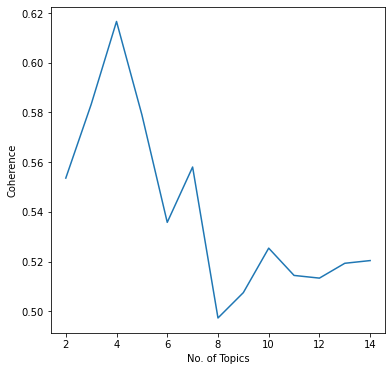

In [42]:
# Plotting the coherence values vs. No. of topics
plt.figure(figsize=(6,6))
plt.plot(range(2,15),coherence_values)
plt.xlabel('No. of Topics')
plt.ylabel('Coherence')
plt.show()

In [43]:
# Printing and checking the coherence values
print(coherence_values)

[0.5535856859121022, 0.5832094028002431, 0.6165749001154976, 0.5790723631835873, 0.5357876521498316, 0.5580419962220642, 0.4973336618666042, 0.5075281388035952, 0.525416464961363, 0.5144434225831692, 0.5133613905670188, 0.5193282370919889, 0.5204169977918914]


## KEY TAKE-AWAYS

    1. We can infer that No. of topics = 4, gives the maximum coherence (0.6165749001154976).

In [44]:
# Generating LDA model with 4 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, id2word=word_dict, num_topics=4, random_state=100, chunksize=1000, passes=50, iterations=100)

# Print and check the keywords for each topic
lda_model.print_topics()

[(0,
  '0.132*"product" + 0.089*"mobile" + 0.037*"money" + 0.033*"amazon" + 0.029*"service" + 0.017*"charger" + 0.017*"waste" + 0.014*"delivery" + 0.014*"value" + 0.013*"customer"'),
 (1,
  '0.072*"phone" + 0.042*"issue" + 0.031*"problem" + 0.019*"time" + 0.018*"battery" + 0.016*"network" + 0.015*"note" + 0.014*"call" + 0.014*"day" + 0.014*"heating"'),
 (2,
  '0.165*"phone" + 0.119*"camera" + 0.051*"quality" + 0.033*"price" + 0.027*"performance" + 0.022*"note" + 0.022*"feature" + 0.013*"range" + 0.013*"lenovo" + 0.012*"k8"'),
 (3,
  '0.164*"battery" + 0.041*"backup" + 0.032*"hour" + 0.020*"charge" + 0.017*"problem" + 0.017*"day" + 0.016*"drain" + 0.015*"charging" + 0.013*"hr" + 0.011*"performance"')]

In [45]:
# Print and check the perplexity of the 
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))

# Generate a coherence model from the LDA model
coherence_lda_model = CoherenceModel(model=lda_model, texts=df_stopwrd_rm, dictionary=word_dict, coherence='c_v')

# Get the coherence value and store in an variable 'coherence_model'
coherence_model = coherence_lda_model.get_coherence()

# Print and check the coherence score
print('Coherence :', coherence_model)

Perplexity:  -6.5727117737906955
Coherence : 0.6165749001154976


In [46]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, word_dict)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.137234  0.049356       1        1  37.218793
2      0.258035 -0.065544       2        1  28.996974
0     -0.225482 -0.231395       3        1  17.664928
3     -0.169786  0.247584       4        1  16.119305, topic_info=            Term         Freq        Total Category  logprob  loglift
4        battery  2837.000000  2837.000000  Default  30.0000  30.0000
58        camera  2956.000000  2956.000000  Default  29.0000  29.0000
16         phone  6408.000000  6408.000000  Default  28.0000  28.0000
50       product  1996.000000  1996.000000  Default  27.0000  27.0000
12        mobile  1347.000000  1347.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
83   performance   155.478639   834.890583   Topic4  -4.4862   0.1444
44          time   121.876359   887.633093   Topic4  -4.7297  -0.1604
134        usage    65.881547   206.088618   Topic4  -5.3448   0.6847
76       heating    91.748183   529.133554   Topic4  -5.0136   0.0730
521   everything    65.299497   212.427970   Topic4  -5.3537   0.6455

[201 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         3  0.999216       amazon
198       1  0.992941      android
648       1  0.994113          app
622       1  0.994899  application
199       1  0.998175         apps
...     ...       ...          ...
186       3  0.999184        waste
142       3  0.984670       weight
1606      4  0.975766         word
621       4  0.990960        worth
342       4  0.980909           ye

[196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

## KEY TAKE-AWAYS

### Topic Names can be categorised as:

    1. Sales and after-sales
    2. Phone issues
    3. Features/Specifications and comparisons
    4. Battery performance

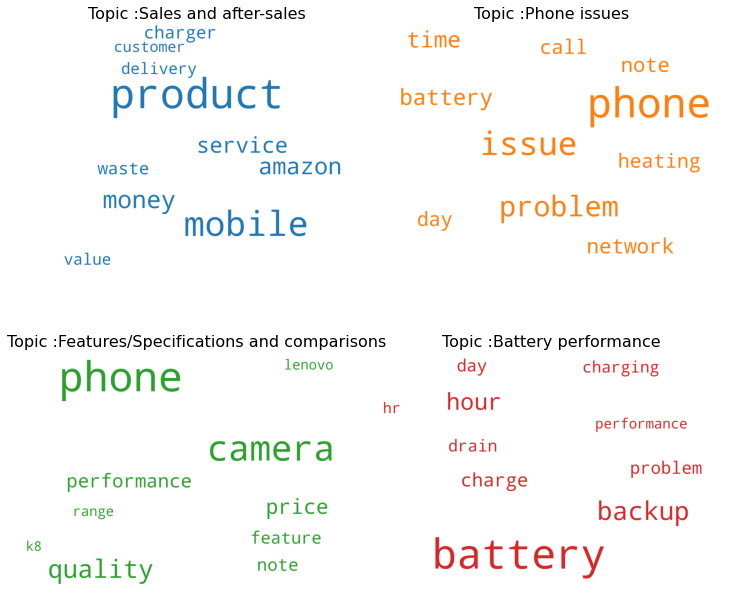

In [47]:
# Printing word cloud for the topics and respective keywords

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

topic_names=['Sales and after-sales', 'Phone issues', 'Features/Specifications and comparisons', 'Battery performance']

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic :' + topic_names[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [48]:
my_dict = {'Topic_' + str(i): [token for token, score in lda_model.show_topic(i, topn=10)] for i in range(0, lda_model.num_topics)}

for key, value in my_dict.items():
    print (key, value)

Topic_0 ['product', 'mobile', 'money', 'amazon', 'service', 'charger', 'waste', 'delivery', 'value', 'customer']
Topic_1 ['phone', 'issue', 'problem', 'time', 'battery', 'network', 'note', 'call', 'day', 'heating']
Topic_2 ['phone', 'camera', 'quality', 'price', 'performance', 'note', 'feature', 'range', 'lenovo', 'k8']
Topic_3 ['battery', 'backup', 'hour', 'charge', 'problem', 'day', 'drain', 'charging', 'hr', 'performance']


In [49]:
my_df = pd.DataFrame(list(my_dict.items()))

print(my_df)

         0                                                  1
0  Topic_0  [product, mobile, money, amazon, service, char...
1  Topic_1  [phone, issue, problem, time, battery, network...
2  Topic_2  [phone, camera, quality, price, performance, n...
3  Topic_3  [battery, backup, hour, charge, problem, day, ...


In [50]:
# Create table with topic names and keywords
my_df.insert(1, "Topic Names", ["Sales and after-sales", "Phone issues", "Features and comparisons", "Battery performance"])

my_df.set_axis(['Topic Number', 'Topic Names', 'Key Words'], axis=1, inplace=True)

my_df

,Topic Number,Topic Names,Key Words
0,Topic_0,Sales and after-sales,"[product, mobile, money, amazon, service, char..."
1,Topic_1,Phone issues,"[phone, issue, problem, time, battery, network..."
2,Topic_2,Features and comparisons,"[phone, camera, quality, price, performance, n..."
3,Topic_3,Battery performance,"[battery, backup, hour, charge, problem, day, ..."
